In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.gridspec as gridspec
import cv2
import matplotlib.image as mpimg
import os
import pickle
import pandas as pd
from sklearn.utils import shuffle
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

## Acquisition Functions

In [2]:
def createDataFrame(data_path):
    """
    input: data_path: path to data
    return: data frame
    """
    data_frame = pd.read_csv(data_path)
    data_frame.columns = ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
    return data_frame

### Split data into left turns, right turns, center (no turns)

In [3]:
def createTrainingDataPathsCLR(df, prefix_path):
    """
    creates training data and training labels/ measurements from a data frame
    inputs:
    df: pandas DataFrame object
    start: starting row to grab data
    end: ending row to grab data
    correction_factor: factor to correct steering angles
    """    
    # Turn types
    center_turns = []
    left_turns = []
    right_turns = []
    
    
    abs_path_to_IMG = os.path.abspath(prefix_path)
    for idx, row in df.iterrows():
        center_image_cam = os.path.join(abs_path_to_IMG, row['center'].strip())
        left_image_cam = os.path.join(abs_path_to_IMG, row['left'].strip())
        right_image_cam = os.path.join(abs_path_to_IMG, row['right'].strip())
        steering_angle = row['steering']
        
        # Right image condition
        if steering_angle > 0.125:
            right_turns.append([center_image_cam, left_image_cam, right_image_cam, steering_angle])
            
        # This is a left image
        elif steering_angle < -1 * 0.125:
            left_turns.append([center_image_cam, left_image_cam, right_image_cam, steering_angle])
            
        # This is a center image
        else:
        # center images
            center_turns.append([center_image_cam, left_image_cam, right_image_cam, steering_angle])
        
    return (center_turns, left_turns, right_turns)

In [4]:
def makeMore(dataArray, amount):
    for i in range(len(dataArray)):
        for j in range(amount):                                    
            dataArray.append([dataArray[i][0], dataArray[i][1], dataArray[i][2], dataArray[i][3]])
    return dataArray

## Prepare training data

### Create data from udacity

#### Create Data Frame

In [5]:
data_pd_udacity = createDataFrame('data/driving_log.csv')
columns = ['center', 'left', 'right', 'steering']

#### Create centers_turns, left_turns, right_turns

In [6]:
(center_turns_udacity,
left_turns_udacity,
right_turns_udacity) = createTrainingDataPathsCLR(data_pd_udacity, 'data/')

#### Make more copies

In [7]:
center_turns_udacity = makeMore(center_turns_udacity, 5)
left_turns_udacity = makeMore(left_turns_udacity, 18)
right_turns_udacity = makeMore(right_turns_udacity, 12)

In [8]:
df_center_udacity = pd.DataFrame(center_turns_udacity, columns = columns)
df_left_udacity = pd.DataFrame(left_turns_udacity, columns = columns)
df_right_udacity = pd.DataFrame(right_turns_udacity, columns = columns)

print('df_center_udacity.index: ', len(df_center_udacity.index))
print('df_left_udacity.index: ', len(df_left_udacity.index))
print('df_right_udacity.index: ', len(df_right_udacity.index))


df_center_udacity.index:  36714
df_left_udacity.index:  16131
df_right_udacity.index:  13884


#### Histogram Visualization

In [9]:
# plt.hist(np.asarray(df_center_udacity['steering'], dtype=np.float32))
# plt.hist(np.asarray(df_center_udacity['steering'], dtype=np.float32),bins=100,range=(-0.2,0.2),facecolor="r", histtype = 'step')

In [10]:
# plt.hist(np.asarray(df_left_udacity['steering'], dtype=np.float32))
# plt.hist(np.asarray(df_left_udacity['steering'], dtype=np.float32),bins=100,range=(-0.6,0.15),facecolor="r", histtype = 'step')

In [11]:
# plt.hist(np.asarray(df_right_udacity['steering'], dtype=np.float32))
# plt.hist(np.asarray(df_right_udacity['steering'], dtype=np.float32),bins=100,range=(0.15,0.6),facecolor="r", histtype = 'step')

#### Shuffle

In [12]:
df_center_udacity = shuffle(df_center_udacity)
df_left_udacity = shuffle(df_left_udacity)
df_right_udacity = shuffle(df_right_udacity)

#### Concat

In [13]:
frames_to_concat_udacity = [df_center_udacity, df_left_udacity, df_right_udacity]
df_udacity = pd.concat(frames_to_concat_udacity, axis = 0, join = 'outer', ignore_index=False)

### Create data from recovery

#### Create Data Frame

In [14]:
data_pd_recovery = createDataFrame('annie_recovery/driving_log_recovery.csv')
columns = ['center', 'left', 'right', 'steering']

#### Create centers_turns, left_turns, right_turns

In [15]:
(center_turns_recovery,
left_turns_recovery,
right_turns_recovery) = createTrainingDataPathsCLR(data_pd_recovery, 'annie_recovery/')

#### Make more copies

In [16]:
center_turns_recovery = makeMore(center_turns_recovery, 5)
left_turns_recovery = makeMore(left_turns_recovery, 18)
right_turns_recovery = makeMore(right_turns_recovery, 12)

In [17]:
df_center_recovery = pd.DataFrame(center_turns_recovery, columns = columns)
df_left_recovery = pd.DataFrame(left_turns_recovery, columns = columns)
df_right_recovery= pd.DataFrame(right_turns_recovery, columns = columns)

In [18]:
print('df_center_recovery.index: ', len(df_center_recovery.index))
print('df_center_recovery.index: ', len(df_left_recovery.index))
print('df_center_recovery.index: ', len(df_right_recovery.index))

df_center_recovery.index:  4308
df_center_recovery.index:  6213
df_center_recovery.index:  3926


#### Histogram Visualization

In [19]:
# plt.hist(np.asarray(df_center_recovery['steering'], dtype=np.float32))
# plt.hist(np.asarray(df_center_recovery['steering'], dtype=np.float32),bins=100,range=(-0.2,0.2),facecolor="r", histtype = 'step')

In [20]:
# plt.hist(np.asarray(df_left_recovery['steering'], dtype=np.float32))
# plt.hist(np.asarray(df_left_recovery['steering'], dtype=np.float32),bins=100,range=(-0.2,0.2),facecolor="r", histtype = 'step')

In [21]:
# plt.hist(np.asarray(df_right_recovery['steering'], dtype=np.float32))
# plt.hist(np.asarray(df_right_recovery['steering'], dtype=np.float32),bins=100,range=(-0.2,0.2),facecolor="r", histtype = 'step')

#### Shuffle

In [22]:
df_center_recovery = shuffle(df_center_recovery)
df_left_recovery = shuffle(df_left_recovery)
df_right_recovery = shuffle(df_right_recovery)

#### Concat

In [23]:
frames_to_concat_recovery = [df_center_recovery, df_left_recovery, df_right_recovery]
df_recovery = pd.concat(frames_to_concat_recovery, axis = 0, join = 'outer', ignore_index=False)

### Concat both dataframes together (Udacity + Recovery)

In [24]:
frames = [df_udacity, df_recovery]
train_data = pd.concat(frames, axis = 0, join = 'outer', ignore_index=False)

In [25]:
print('train_data size: ', len(train_data.index))

train_data size:  81176


### Shuffle again

In [26]:
train_data = shuffle(train_data)

### Train Test Split

In [27]:
train_data, valid_data = train_test_split(train_data, test_size = 0.2)
print('train_data size: ', len(train_data.index))
print('valid_data size: ', len(valid_data.index))

train_data size:  64940
valid_data size:  16236


#### Histogram of steering angles training data

(array([  1630.,    760.,   1915.,   7226.,  10891.,  35491.,   4379.,
          1053.,    407.,   1188.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

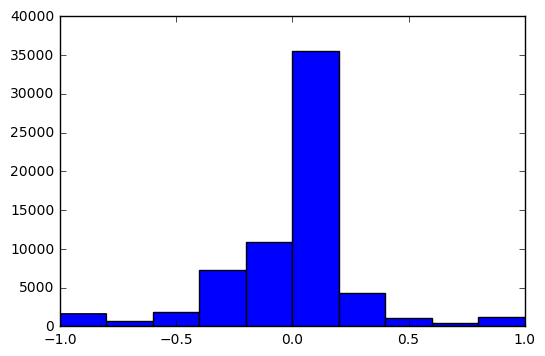

In [28]:
plt.hist(np.asarray(train_data['steering']))

## Preprocess

In [29]:
def lateral_shift(image, ang):
    pass

In [30]:
def flip_image(image, ang):
    image = np.fliplr(image)
    ang = -1 * ang
    return (image, ang)

In [31]:
def change_brightness(image):
    bright_factor = 0.25 + np.random.uniform()
    
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    # perform brightness augmentation only on the second channel
    hsv_image[:,:,2] = hsv_image[:,:,2] * bright_factor
    
    # change back to RGB
    image_rgb = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
    return image_rgb
    
    

In [32]:
def preprocess_image(image):
    """
    Preprocess image, 
    input: image (original shape)
    output: image (shape is (220, 66, 3) )
    """    
    image = change_brightness(image)
    # crop shape
    image = image[image.shape[0] * 0.34:image.shape[0] * 0.875,:,:]
    # resize to (66, 220)
    img = cv2.resize(image, (220, 66), interpolation=cv2.INTER_AREA)
    return img


In [33]:
def preprocess_image_valid_from_path(image_path, steering_angle):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = preprocess_image(img)
    return img, steering_angle

In [34]:
def preprocess_image_from_path(image_path, steering_angle):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # flip and reassign
    random_flip_factor = np.random.randint(2)
    if random_flip_factor == 0:
        img, steering_angle = flip_image(img, steering_angle)
    
        
    img = preprocess_image(img)
    return img, steering_angle

## Generators

##### Training

Here I created two generators, one for training data and one for validation data. In the training generator we create batches of 32 for each training sample. Therefore if I have `samples_per_epoch = 20480` that means for each of those samples (in 20480) I yield batch_size = 16 * 2 images from the training generator. I did this because it allows me to have control over what the batches turn out to be. In this case I give a 33% chance to switch the second center camera image with a left or right camera images and apply a correction factor to offset the angles of those camera images

##### Validation

In this generator I simply yield one image, angle tuple for each iteration. During training I used `samples_per_epoch = length of validation data` so it is running through all the validation data one by one

In [35]:

def generate_training_data(data, batch_size = 32):
    """
    We create a loop through out data and 
    send out an individual row in the dataframe to preprocess_image_from_path, 
    which is then sent to preprocess_image
    inputs: 
    data: pandas DataFrame
    batch_size: batch sizes, size to make each batch
    returns a yield a batch of (image_batch, label_batch)
    """    
    image_batch = np.zeros((batch_size * 2, 66, 220, 3)) # nvidia input params
    label_batch = np.zeros((batch_size * 2))
    while True:
        for i in range(batch_size):
            idx = np.random.randint(len(data))
            row = data.iloc[[idx]].reset_index()
            x, y = preprocess_image_from_path(row['center'].values[0], row['steering'].values[0])
            
            # preprocess another center image
            x2, y2 = preprocess_image_from_path(row['center'].values[0], row['steering'].values[0])
            
            if np.random.randint(3) == 1:
                # 33% chance to overwrite center image (2) with left image + correction_factor
                x2, y2 = preprocess_image_from_path(row['left'].values[0], row['steering'] + 0.125)
                
            if np.random.randint(3) == 2:
                # 33% change to overwrite center image (2) give right image - correction_factor
                x2, y2 = preprocess_image_from_path(row['right'].values[0], row['steering'] - 0.125)
            
            
            image_batch[i] = x
            label_batch[i] = y
            
            image_batch[i + 1] = x2
            label_batch[i + 1] = y2
            
        yield shuffle(image_batch, label_batch)
    
def generate_validation_data(data):
    """
    data: center camera images only, because thats what we observe (dataframe)
    yields: one image, angle
    """
    while True:
        for idx in range(len(data)):
            row = data.iloc[[idx]].reset_index()
            img, angle = preprocess_image_valid_from_path(row['center'].values[0], row['steering'].values[0])
            img = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])
            angle = np.array([[angle]])
            yield img, angle
            

## Network

#### I chose to use Nvidia's network architecture. Input (220 x 66 sized image) output (1 steering angle)

I chose to use the Nvidia model architecture which can be found [here add link]
I used ELu's because they push mean unit activation functions closer to zero [https://arxiv.org/pdf/1511.07289v1.pdf]

In [36]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.core import Activation, Dropout, Flatten, Dense, Lambda
from keras.layers import ELU
from keras.optimizers import Adam
tf.python.control_flow_ops = tf


N_img_height = 66
N_img_width = 220
N_img_channels = 3
def nvidia_model():
    inputShape = (N_img_height, N_img_width, N_img_channels)

    model = Sequential()
    # normalization
    
    # normalize only the S in HSV
    model.add(Lambda(lambda x: x/ 127.5 - 1, input_shape = inputShape))

    model.add(Convolution2D(24, 5, 5, 
                            subsample=(2,2), 
                            border_mode = 'valid',
                            init = 'he_normal',
                            name = 'conv1'))
    
    model.add(ELU())    
    model.add(Convolution2D(36, 5, 5, 
                            subsample=(2,2), 
                            border_mode = 'valid',
                            init = 'he_normal',
                            name = 'conv2'))
    
    model.add(ELU())    
    model.add(Convolution2D(48, 5, 5, 
                            subsample=(2,2), 
                            border_mode = 'valid',
                            init = 'he_normal',
                            name = 'conv3'))
    model.add(ELU())
    model.add(Dropout(0.5))
    model.add(Convolution2D(64, 3, 3, 
                            subsample = (1,1), 
                            border_mode = 'valid',
                            init = 'he_normal', #gaussian init
                            name = 'conv4'))
    
    model.add(ELU())              
    model.add(Convolution2D(64, 3, 3, 
                            subsample= (1,1), 
                            border_mode = 'valid',
                            init = 'he_normal',
                            name = 'conv5'))
              
              
    model.add(Flatten(name = 'flatten'))
    model.add(ELU())
    model.add(Dense(100, init = 'he_normal', name = 'fc1'))
    model.add(ELU())
    model.add(Dense(50, init = 'he_normal', name = 'fc2'))
    model.add(ELU())
    model.add(Dense(10, init = 'he_normal', name = 'fc3'))
    model.add(ELU())
    
    # do not put activation at the end because we want to exact output, not a class identifier
    model.add(Dense(1, name = 'output', init = 'he_normal'))
    
    adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(optimizer = adam, loss = 'mse')

    return model


Using TensorFlow backend.


### Saving

In [37]:
from pathlib import Path
import json

def save_model(modelJSON, weights):

    print('saving model to disk: ', modelJSON, weights)
    
    if Path(modelJSON).is_file():
        os.remove(modelJSON)
    json_string = model.to_json()
    
    with open(modelJSON,'w' ) as f:
        json.dump(json_string, f)
    if Path(weights).is_file():
        os.remove(weights)
    model.save_weights(weights)

In [38]:
val_size = len(valid_data.index)
valid_generator = generate_validation_data(valid_data)
BATCH = 16

In [39]:
model = nvidia_model()
train_size = len(train_data.index)

i_best = 0
val_best = 100000000
for i in range(3):
    train_generator = generate_training_data(train_data, BATCH)
    history = model.fit_generator(
            train_generator, 
            samples_per_epoch = 20480, # try putting the whole thing in here in the future
            nb_epoch = 6,
            validation_data = valid_generator,
            nb_val_samples = val_size)

    modelJSON = 'model_' + str(i) + '.json'
    weights = 'model_' + str(i) + '.h5'
    
    save_model(modelJSON, weights)
    
    val_loss = history.history['val_loss'][0]
    
    # check which model has lowerst validation loss and set that to the model to be saves
    if val_loss < val_best:
        val_best = val_loss
        i_best = i
        
print('best model at : ', i_best)
print('lowest val loss at : ', val_best)

Epoch 1/6


/home/jj/anaconda2/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


20480/20480 [==============================] - 121s - loss: 0.0308 - val_loss: 0.0464
Epoch 2/6
20480/20480 [==============================] - 118s - loss: 0.0265 - val_loss: 0.0426
Epoch 3/6
20480/20480 [==============================] - 117s - loss: 0.0229 - val_loss: 0.0417
Epoch 4/6
20480/20480 [==============================] - 119s - loss: 0.0205 - val_loss: 0.0362
Epoch 5/6
20480/20480 [==============================] - 117s - loss: 0.0201 - val_loss: 0.0348
Epoch 6/6
20480/20480 [==============================] - 118s - loss: 0.0192 - val_loss: 0.0336
saving model to disk:  model_0.json model_0.h5


NameError: name 'val_best' is not defined

## Visualizing Loss

In [ ]:
print(history.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

### RANDOM TEST

### Visualize preprocessing

Randomly select some data points and show how our preprocessing affects the images

In [ ]:
# random selection
data = train_data
random_images = []
for i in range(20):
    idx = np.random.randint(len(data))
    row = data.iloc[[idx]].reset_index()
    x, y = preprocess_image_from_path(row['center'].values[0], row['steering'].values[0])
    random_images.append((x, y))
    
plt.figure(figsize=(16, 10))
gs1 = gridspec.GridSpec(4, 5)
gs1.update(wspace = 0.01, hspace = 0.01)
for idx, image in enumerate(random_images):
    angle = 'ang: ' + str(image[1]) 
    ax1 = plt.subplot(gs1[idx])
    ax1.axis('off')
    plt.title(angle)
    plt.imshow(image[0])
plt.show()

At one point I tried to gaussian fit my data via angle distributions. Attempting this was a brutal task and I spent many many hours on it

## Explanation

### Data Acquisition

### Gathering data

I primarily used udacity's data and a recovery dataset. The recovery data was hard to gather because I do not have a controller. Udacity's provided data 

##### Data Harnessing
At first I created a separate data acquisition file where I would acquire all my data, modify it, and then save it to a pickle file, and then import that data using the file where I would train my network. This eventually became too difficult to work with as the complexity of the project increased I found myself going between two files, and just hoping that I was passing the correct data through a pickle file. Eventually I decided to write everything in this jupyter notebook.

#### Data sorting
I used pandas dataframes to sort through my data and aggregate it. This was extremely helpful because it allowed me to distinguish between turn types and camera types (center_cam, left_cam, right_cam). I took this approach after trying many times to use numpy arrays. With the numpy array implementation I was passing two arrays into my generators, with the dataframe implementation I only have to pass through the dataframe. This made life simpler

#### Arrays vs Dataframes

I had multiple implementations of this program. One was using numpy arrays, and the other is using dataframes. When I was using numpy arrays I had no way to nicely sort the center_turns, left_turns, and right_turns from each other because I simply concatenated them together into one large training array. I soon realized needed to separate each turn type in order to add more of some turns to balance out the histogram of steering angles. I had so many angles ~0 degrees (which is just the car going straight). Pandas dataframes were a great options for this. 

Originally I was just pushing all the images into an array, adding a correction factor to the left_cam images and subtracting a correction factor from the right images. However this was extremely inefficient. After choosing the pandas DataFrame method I was able to add the correction factor to left_camera and right_camera images on the fly and send them through the preprocessing pipeline

#### Data Creation

I added additional data from the existing data in this dataset to attempt to get a more uniform distribution of turn types. I added `18 X left_turns` and `12 x right_turns`. This was because my first goal was to get it working on track 1. In order to generalize to track two I should probably use `15 X left_turns` and `15 X right_turns`

#### Histogram of steering angles

When we are acquiring data on the track, we are primarily driving straight. So as you can see most of our steering angle values are 0 or very close to it. In order to train my model to turn as needed I had to try to get as close to a gaussian distribution of center_turns, left_turns, and right_turns. I chose gaussian as a goal because that would work on a track that is primarily straight (66% straight), and not primarily turn-based (33% turns) which is what I estimate the second track to be. Here we can observe the difference

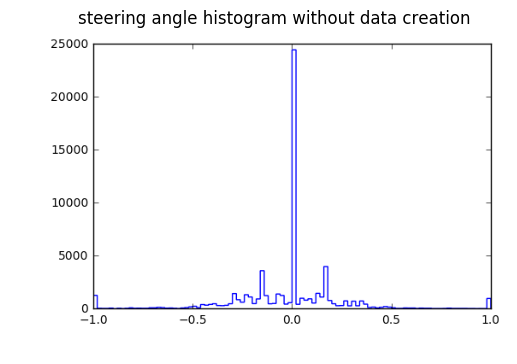

In [49]:
hist_with_creation = mpimg.imread('train_data_steering.png')
plt.title('steering angle histogram without data creation')
plt.axis('off')
plt.imshow(hist_with_creation)

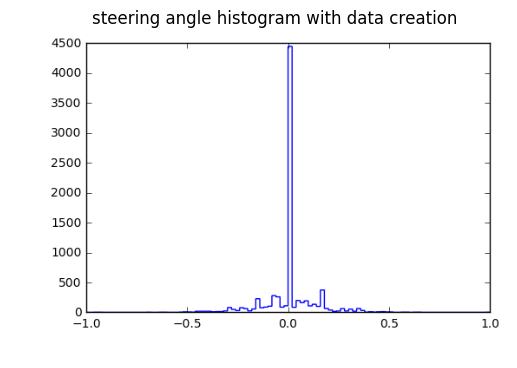

In [50]:
hist_no_creation = mpimg.imread('y_train_cwr2.png')
plt.title('steering angle histogram with data creation')
plt.axis('off')
plt.imshow(hist_no_creation)

### Preprocessing

#### Brightness
* I augmented the brightness by a random uniform value, this is because track 2 has shadows and images may appear darker than on track 1

#### Flip
* I flip each image with 50% chance. This is because I only used training data on a counter-clockwise track and I would like it to be able to work on a clockwise track. After flipping the images I inverted the steering angle

#### Crop
* I cropped each image to subtract the sky and the steering wheel from the height

#### Resize
* I resized each image from (160,320,3) to (66, 220, 3) to accompany The Nvidia Model Architecture

### Generating Batches
I chose to generate batches of my training data instead of yielding a single image each time so I have more control on the distribution of what gets yielded. If I was yielding an image each time, I would increase my `samples_per_epoch` in my `train_generator` to be equal to the number of sample images in my dataset. This way I simply make that a lower number and yield batches. Yielding batches also helps to avoid possible errors if I attempted to control the distribution of center_cam, left_cam, and right_cam images via probability

##### Method 1:
I already created additional data for each center_turn, left_turn, and right_turn respectively. What I attempted to do in my generator was double my batch size. From 16 to 32. 
* Immediately push in a center_cam processed image
* 66% chance to push in another center_cam image
* 33% chance to push in a left_cam image
* 33% chance to push in a right_cam image
This will allow me to introduce random left and right cam images into the dataset, creating additional data.
* <strong>This worked! successful track 1</strong> <font color = 'red'>(submitted)</font>

#### Method 2:
The second method was to maintain the batch size at 32 images per batch and to create a 33% chance to push a center_cam, left_cam, or right_cam
* 33% chance for center_cam
* 33% chance for left_cam
* 33% chance for right_cam

#### Method 3:
The third method was to maintain a batch size at 32 and only push in center images

#### Method 4:
Increase batch size to 256 and only use center images <strong>This worked also </strong>

### Network Architecture

I chose to use the Nvidia model [https://arxiv.org/pdf/1604.07316v1.pdf]. In the preprocessing stages I converted my image from 160,320,3 to 60, 220, 3 (RGB)
* attempt 1: I attempted to convert the image to HSV and only normalize the S channel. This turned out to [add effect]
* attempt 2: I kept the image as RGB and fed that into the network and performed normalization on all three channels [red, green, blue]

I used ELu's because they push mean unit activation functions closer to zero [https://arxiv.org/pdf/1511.07289v1.pdf]

#### Choice 1: Dropout

I used dropout to increase normalization. I used a dropout `p = 0.5` between the 2nd and 3rd convolutional layers, before applying 64 filters. This basically dropped half the values right in the middle.
* After adding the dropout layer I had to decrease my batch size significantly because I was running out of memory very fast
* I moved my batch size from 128 to 16

#### Choice 2: No Dropout

#### ReLu's vs ELu's

### Training

* I used adam optimization and MSE
* I used 20k samples per epoch because I have about 80k images and I do not want to sample the entire set each time

I chose to train three models sequentialls, each picking up after the next one. This is kind of like transfer learning on the same network, I am just retraining it each time with the same weights intact

## Getting it to work

Most of this project was experimental. I would get the car to drive, and then run into some sort of wall or something. Then I would start tinkering with the preprocessing stages. I did not modify the network architecture that much other than including a dropout layer so I did not overfit my training data. The dropout layer will help me normalize and generalize to track 2

### Realizations:
The worst part of this project was myself and my own habits. I wrote so much code that I ended up erasing. I tried to fit my dataset to a gaussian-like multimodal distribution using different steering angles and creating data based on a random gaussian percentage. I spent ~6 hours on this and I ended up scraping it because it didn't work because the mean was 0.004 and the stddev was 0.016 except for the fast that the steering angles are in completely different ranges. 

* My workflow was pretty neat. I trained the models on one computer (with a GPU) and then tested them on a laptop so I could perform a test at the same time I was training the next model with a new modification